In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D

In [3]:
imagesize=256

train_generator=ImageDataGenerator(featurewise_center=True, 
                                   vertical_flip=True,
                                   preprocessing_function=preprocess_input)

train_gen=train_generator.flow_from_directory('fingerprintClassificationDatabase/trainingSet',
                                              target_size=(256,256),
                                              batch_size=10,
                                              class_mode='categorical')

validation_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

validation_gen=validation_generator.flow_from_directory('fingerprintClassificationDatabase/testSet',
                                                        target_size=(imagesize,imagesize),
                                                        batch_size=10,
                                                        class_mode='categorical')

Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.


In [4]:
base_model = ResNet50(include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)

x=Dense(512,activation='relu')(x)

predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
from tensorflow.keras.optimizers import Nadam
model.compile(optimizer=Nadam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004), metrics=['accuracy'],loss='categorical_crossentropy')

In [6]:
model.fit_generator(train_gen, 
                    steps_per_epoch=45,
                    epochs=15,
                    validation_data=validation_gen, 
                    validation_steps=50)

Epoch 1/15


C:\Users\mohib\Anaconda3\lib\site-packages\keras_preprocessing\image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


45/45 [==============================] - 801s 18s/step - loss: 1.1749 - acc: 0.5200 - val_loss: 6.6586 - val_acc: 0.3540
Epoch 2/15
45/45 [==============================] - 786s 17s/step - loss: 0.8135 - acc: 0.6956 - val_loss: 1.1603 - val_acc: 0.7220
Epoch 3/15
45/45 [==============================] - 785s 17s/step - loss: 0.6811 - acc: 0.7511 - val_loss: 0.5896 - val_acc: 0.7620
Epoch 4/15
45/45 [==============================] - 789s 18s/step - loss: 0.6469 - acc: 0.7889 - val_loss: 0.9061 - val_acc: 0.6760
Epoch 5/15
45/45 [==============================] - 787s 17s/step - loss: 0.5325 - acc: 0.8156 - val_loss: 0.4534 - val_acc: 0.8100
Epoch 6/15
45/45 [==============================] - 787s 17s/step - loss: 0.4439 - acc: 0.8311 - val_loss: 0.4050 - val_acc: 0.8440
Epoch 7/15
45/45 [==============================] - 787s 17s/step - loss: 0.4080 - acc: 0.8689 - val_loss: 0.4571 - val_acc: 0.8360
Epoch 8/15
45/45 [==============================] - 788s 18s/step - loss: 0.3941 - acc:

In [7]:
score_training=model.evaluate_generator(validation_gen, 
                         steps=10, 
                         verbose=0)
print("Loss of trained model :",score_training[0])
print("Accuracy of trained model :",score_training[1])

Loss of trained model : 0.4010588064789772
Accuracy of trained model : 0.8299999952316284


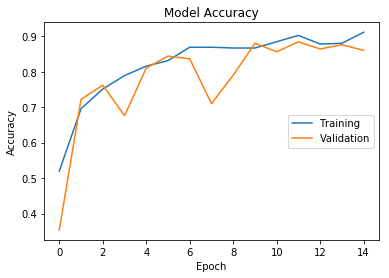

In [8]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='center right')
plt.show()

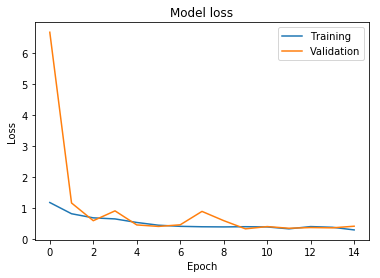

In [9]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [81]:
from tensorflow.keras.preprocessing import image 
test_image = image.load_img('left_loop.jpeg', target_size = (256, 256))

In [82]:
test_image = image.img_to_array(test_image)

In [83]:
test_image = np.expand_dims(test_image, axis = 0)

In [84]:
predictions = model.predict(test_image)

In [85]:
print("Predictions:")
print("Arch:", (predictions[0][0])*100,"%")
print("Left Loop:", (predictions[0][1])*100,"%")
print("Right Loop:", (predictions[0][2])*100,"%")
print("Tended Arch:", (predictions[0][3])*100,"%")
print("Whirl:", (predictions[0][4])*100,"%")

Predictions:
Arch: 0.22082084324210882 %
Left Loop: 96.84082865715027 %
Right Loop: 0.014203056343831122 %
Tended Arch: 0.5413543432950974 %
Whirl: 2.382793463766575 %


In [86]:
predictions

array([[2.2082084e-03, 9.6840829e-01, 1.4203056e-04, 5.4135434e-03,
        2.3827935e-02]], dtype=float32)

In [87]:
train_gen.class_indices

{'A': 0, 'L': 1, 'R': 2, 'T': 3, 'W': 4}

In [88]:
from tensorflow.keras.models import load_model
model.save('resNet_model_for_fingerprintClassification_pkl.pkl')  

In [89]:
model.save('resNet_model_for_fingerprintClassification_hdf5.hd5')